In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from imblearn.over_sampling import SMOTE   # Synthetic minority oversampling technique

In [4]:
data =pd.read_csv("heart.csv")


In [5]:
data = data.sample(10000) # Decreasing the sample size because SVM was taking a lot of time

## **Heart_Attack is my target variable.**

In [6]:
data.head()

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Sleep_Hours,Occupation,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
25778,25779.0,36,Male,Rural,126.6,188.1,30.3,96.0,Moderate,False,Moderate,False,False,8.0,False,False,True,Mixed,7.8,Employed,Low,Moderate,Higher,Married,Urban,False,4.0,4.5,10.0,False
930,931.0,25,Female,Suburban,124.7,234.0,19.7,81.0,Moderate,False,NaN,False,False,3.0,False,False,False,Unhealthy,8.4,Employed,High,High,Primary,Married,Urban,False,1.0,4.6,8.0,True
33659,33660.0,49,Female,Suburban,96.3,180.6,16.3,78.0,High,False,Moderate,False,False,5.0,False,False,False,Unhealthy,6.9,Employed,Low,Low,Primary,Married,Urban,True,3.0,3.0,8.0,False
31725,31726.0,53,Female,Urban,98.4,313.1,27.9,67.0,Moderate,False,NaN,True,False,8.0,False,False,False,Healthy,4.4,Employed,Middle,Moderate,Higher,Divorced,Rural,True,1.0,5.0,8.0,True
47523,47524.0,38,Female,Urban,129.9,201.6,25.2,73.0,Low,False,Moderate,False,True,10.0,False,True,False,Unhealthy,7.2,Student,Low,Low,Primary,Divorced,Urban,True,4.0,4.3,3.0,False


In [7]:
data.info() #no inconsistent data type 

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 25778 to 20917
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     9991 non-null   float64
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Region                 9991 non-null   object 
 4   Blood_Pressure         9988 non-null   float64
 5   Cholesterol            10000 non-null  float64
 6   BMI                    10000 non-null  float64
 7   Heart_Rate             9973 non-null   float64
 8   Exercise_Level         9946 non-null   object 
 9   Smoking                9967 non-null   object 
 10  Alcohol_Consumption    4923 non-null   object 
 11  Diabetes               9967 non-null   object 
 12  Family_History         9967 non-null   object 
 13  Stress_Level           9966 non-null   float64
 14  Heart_Attack           9967 non-null   object 
 15  Ang

## **Checking redundant columns i.e. ID**

In [8]:
data.drop("ID",axis=1,inplace=True)

In [9]:
data.shape

(10000, 29)

In [10]:
data.head(1)

,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Sleep_Hours,Occupation,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
25778,36,Male,Rural,126.6,188.1,30.3,96.0,Moderate,False,Moderate,False,False,8.0,False,False,True,Mixed,7.8,Employed,Low,Moderate,Higher,Married,Urban,False,4.0,4.5,10.0,False


## **Checking duplicate rows**

In [11]:
data.duplicated()

25778    False
930      False
33659    False
31725    False
47523    False
         ...  
5674     False
11056    False
36730    False
20442    False
20917    False
Length: 10000, dtype: bool

In [12]:
data[data.duplicated()]

,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Sleep_Hours,Occupation,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity


## **Checking null values**

In [13]:
data.shape

(10000, 29)

In [14]:
data.isnull().sum()/data.shape[0]*100

Age                       0.00
Gender                    0.00
Region                    0.09
Blood_Pressure            0.12
Cholesterol               0.00
BMI                       0.00
Heart_Rate                0.27
Exercise_Level            0.54
Smoking                   0.33
Alcohol_Consumption      50.77
Diabetes                  0.33
Family_History            0.33
Stress_Level              0.34
Heart_Attack              0.33
Angina                    0.37
Heart_Disease_History     0.24
Diet                      0.24
Sleep_Hours               0.24
Occupation                0.37
Income_Level              0.24
Physical_Activity         0.24
Education_Level           0.24
Marital_Status            0.31
Urban_Rural               0.31
Medication                0.24
Health_Awareness          0.24
Daily_Water_Intake        0.24
Mental_Health             0.24
Obesity                   0.00
dtype: float64

In [15]:
data.Heart_Attack.unique()

array([False, True, nan], dtype=object)

In [16]:
d = data[data["Heart_Attack"].isnull()==True].index

In [17]:
d

Index([ 94,  85, 289, 106,  49, 290,  72,  75,  81,  60, 296,  57, 125,  65,
        55, 101, 292,  78,  74, 100,  52,  86,  98,  79,  96, 111, 120, 295,
        84, 105, 293, 116,  97],
      dtype='int64')

In [18]:
data.drop(d,inplace=True)

## **Filling null values** 

In [19]:
data.isnull().sum()/data.shape[0]*100

Age                       0.000000
Gender                    0.000000
Region                    0.090298
Blood_Pressure            0.000000
Cholesterol               0.000000
BMI                       0.000000
Heart_Rate                0.000000
Exercise_Level            0.210695
Smoking                   0.000000
Alcohol_Consumption      50.607003
Diabetes                  0.000000
Family_History            0.000000
Stress_Level              0.010033
Heart_Attack              0.000000
Angina                    0.080265
Heart_Disease_History     0.010033
Diet                      0.010033
Sleep_Hours               0.010033
Occupation                0.120397
Income_Level              0.010033
Physical_Activity         0.010033
Education_Level           0.010033
Marital_Status            0.060199
Urban_Rural               0.060199
Medication                0.010033
Health_Awareness          0.010033
Daily_Water_Intake        0.010033
Mental_Health             0.010033
Obesity             

In [20]:
for i in data.select_dtypes(include="object"):
    data[i].fillna(data[i].mode()[0],inplace=True)

In [21]:
data.Alcohol_Consumption.mode()[0]

'Moderate'

In [22]:
for i in data.select_dtypes(exclude="object"):
    data[i].fillna(data[i].mean(),inplace=True)

In [23]:
data.isnull().sum()/data.shape[0]*100

Age                      0.0
Gender                   0.0
Region                   0.0
Blood_Pressure           0.0
Cholesterol              0.0
BMI                      0.0
Heart_Rate               0.0
Exercise_Level           0.0
Smoking                  0.0
Alcohol_Consumption      0.0
Diabetes                 0.0
Family_History           0.0
Stress_Level             0.0
Heart_Attack             0.0
Angina                   0.0
Heart_Disease_History    0.0
Diet                     0.0
Sleep_Hours              0.0
Occupation               0.0
Income_Level             0.0
Physical_Activity        0.0
Education_Level          0.0
Marital_Status           0.0
Urban_Rural              0.0
Medication               0.0
Health_Awareness         0.0
Daily_Water_Intake       0.0
Mental_Health            0.0
Obesity                  0.0
dtype: float64

In [24]:
data.Heart_Attack = data["Heart_Attack"].astype(np.number)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [25]:
x=data.drop("Heart_Attack",axis=1)
y = data.Heart_Attack

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=13)

## **Outlier treatment** 

In [27]:
for i in xtrain.select_dtypes(include=np.number):
    q1=xtrain[i].quantile(0.25)
    q3=xtrain[i].quantile(0.75)
    iqr=q3-q1
    u=q3+1.5*iqr
    l=q1-1.5*iqr
    xtrain[i]=xtrain[i].clip(lower=l,upper=u)

In [28]:
for i in xtrain.select_dtypes(include="object"):
    print(i)
    print(xtrain[i].unique())

Gender
['Male' 'Female' 'Other']
Region
['Urban' 'Suburban' 'Rural']
Exercise_Level
['High' 'Moderate' 'Low']
Smoking
[False True]
Alcohol_Consumption
['Heavy' 'Moderate']
Diabetes
[False True]
Family_History
[False True]
Diet
['Mixed' 'Healthy' 'Unhealthy']
Occupation
['Retired' 'Employed' 'Unemployed' 'Student']
Income_Level
['High' 'Middle' 'Low']
Physical_Activity
['Low' 'Moderate' 'High']
Education_Level
['Secondary' 'Higher' 'Primary']
Marital_Status
['Married' 'Divorced' 'Single' 'Widowed']
Urban_Rural
['Rural' 'Urban']
Obesity
[True False]


<Axes: xlabel='Heart_Attack'>

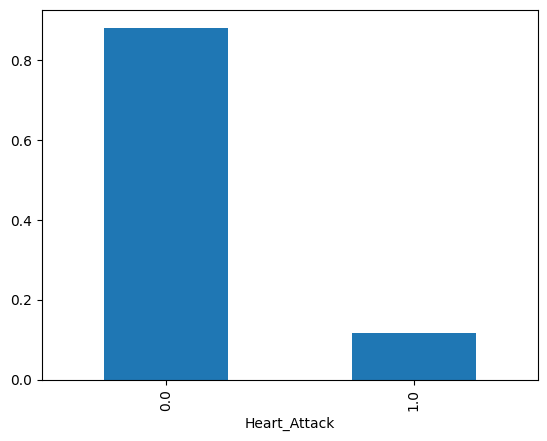

In [29]:
data["Heart_Attack"].value_counts(normalize=True).plot(kind="bar")

Age


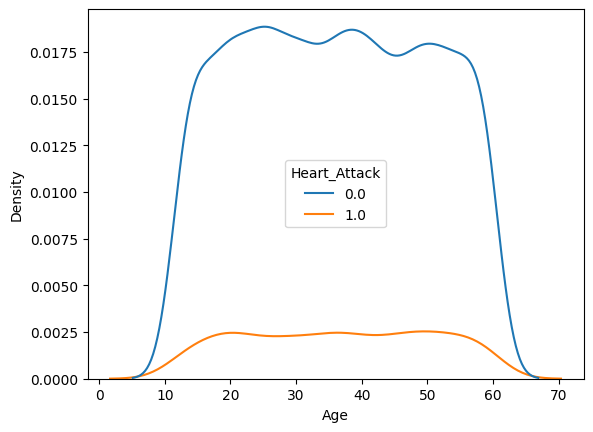

Blood_Pressure


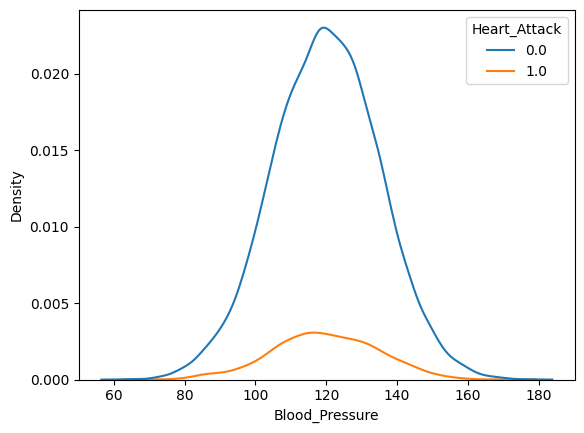

Cholesterol


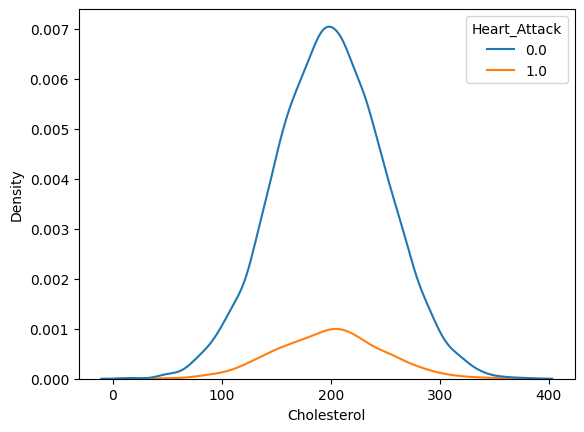

BMI


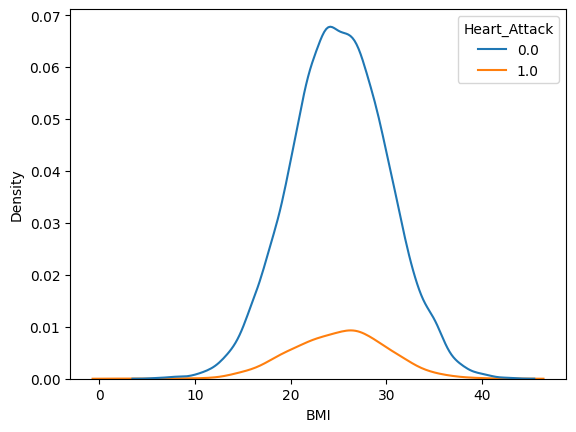

Heart_Rate


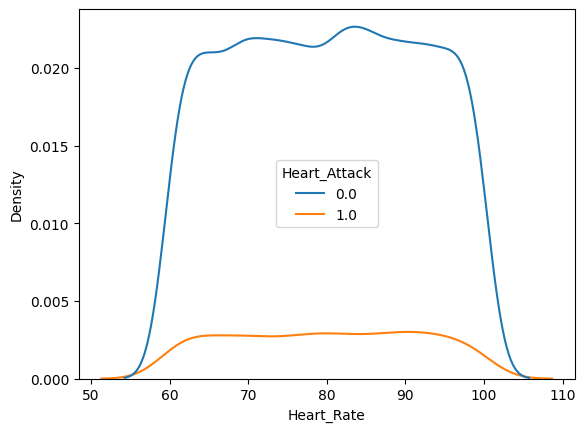

Stress_Level


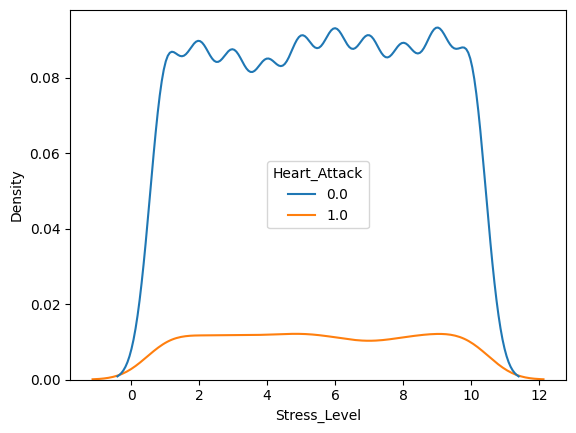

Heart_Attack


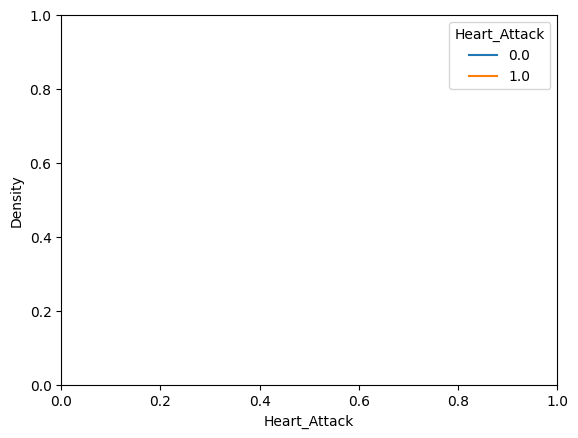

Angina


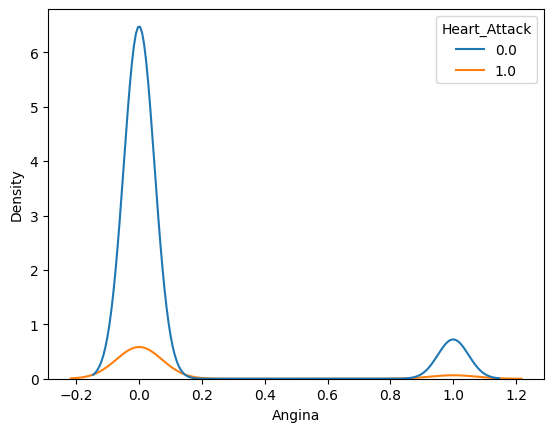

Heart_Disease_History


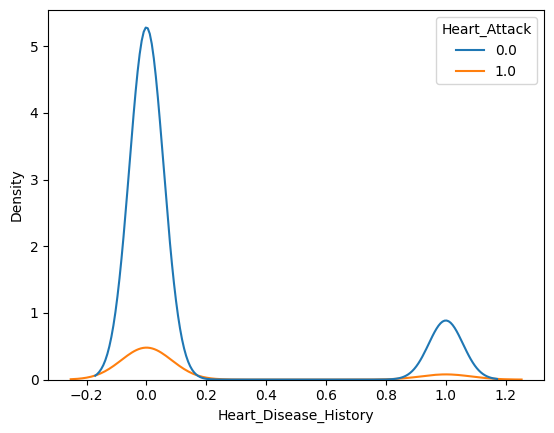

Sleep_Hours


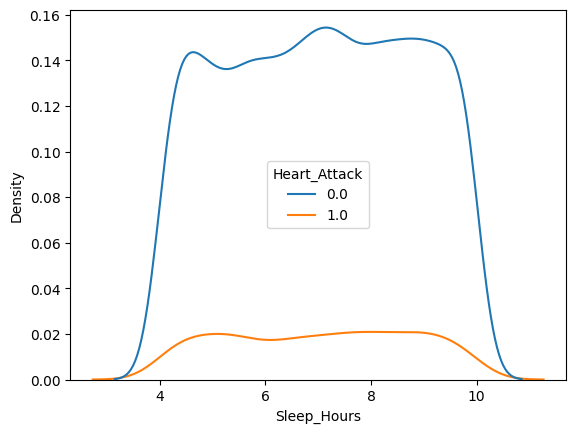

Medication


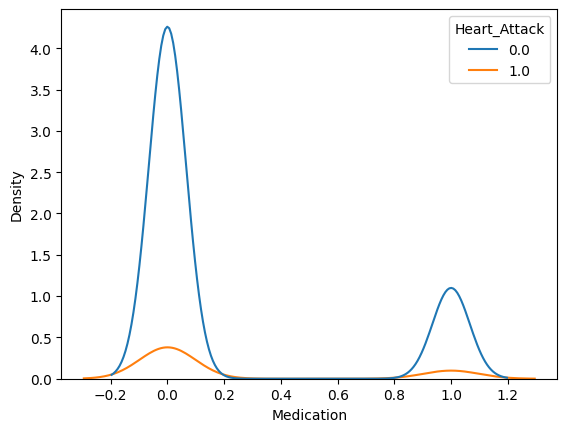

Health_Awareness


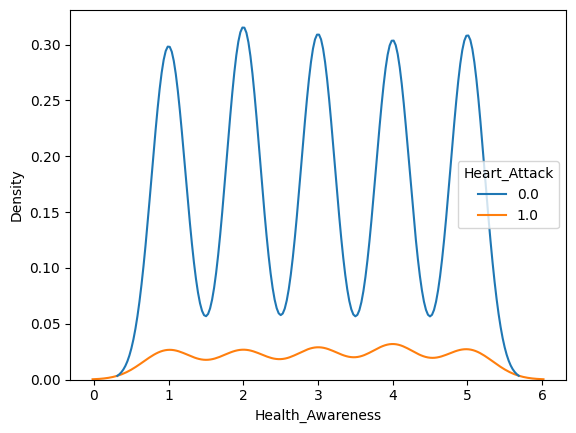

Daily_Water_Intake


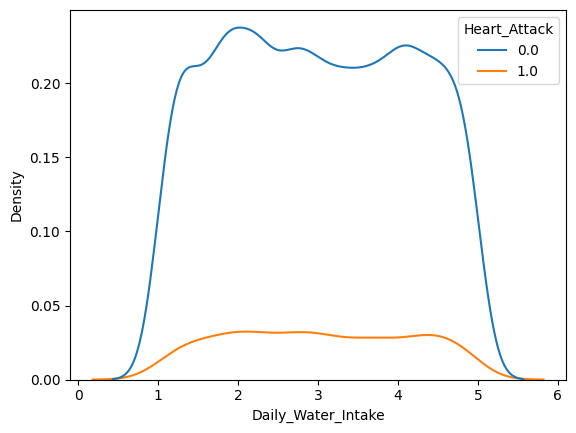

Mental_Health


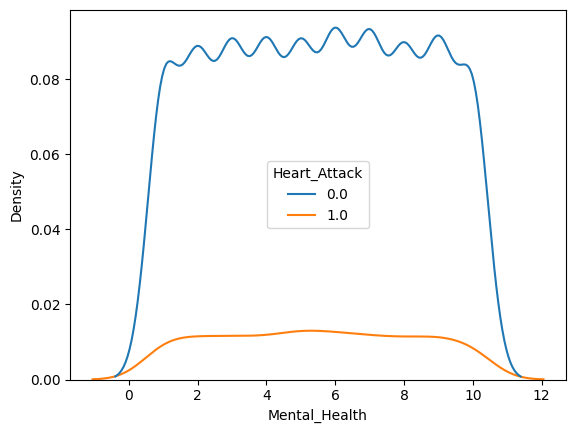

In [30]:
for i in data.select_dtypes(exclude="object"):
    print(i)
    sns.kdeplot(x=data[i], hue = data["Heart_Attack"])
    plt.show()

### **excersie level , alochol consuption , income level , physical activity ,diet**
### **education level --- has ordinal data**

In [31]:
ordrinal_data = ["Physical_Activity","Income_Level","Exercise_Level"]

In [32]:
for i in ordrinal_data:
    xtest[i]=xtest[i].apply(lambda x: 3 if x=="High"  else  1 if x=="Low"  else 2)
    xtrain[i]=xtrain[i].apply(lambda x: 3 if x=="High"  else  1 if x=="Low"  else 2)
    

In [33]:
for i in ordrinal_data:
    print(i,xtrain[i].unique(),xtest[i].unique())

Physical_Activity [1 2 3] [2 1 3]
Income_Level [3 2 1] [2 1 3]
Exercise_Level [3 2 1] [3 1 2]


In [34]:
xtest["Diet"]=xtest["Diet"].apply(lambda x: 3 if x=='Healthy'  else  1 if x=='Unhealthy'  else 2)
xtrain["Diet"]=xtrain["Diet"].apply(lambda x: 3 if x=='Healthy'  else  1 if x=='Unhealthy'  else 2)
xtrain["Diet"].unique(),xtest["Diet"].unique()    

(array([2, 3, 1]), array([1, 2, 3]))

In [35]:
xtest["Alcohol_Consumption"]=xtest["Alcohol_Consumption"].apply(lambda x: 3 if x=='Heavy'  else  2)
xtrain["Alcohol_Consumption"]=xtrain["Alcohol_Consumption"].apply(lambda x: 3 if x=='Heavy'  else   2)
xtrain["Alcohol_Consumption"].unique(),xtest["Alcohol_Consumption"].unique()    

(array([3, 2]), array([2, 3]))

In [36]:
for i in xtrain.select_dtypes(include="object"):
    print(i)
    print(xtrain[i].unique())

Gender
['Male' 'Female' 'Other']
Region
['Urban' 'Suburban' 'Rural']
Smoking
[False True]
Diabetes
[False True]
Family_History
[False True]
Occupation
['Retired' 'Employed' 'Unemployed' 'Student']
Education_Level
['Secondary' 'Higher' 'Primary']
Marital_Status
['Married' 'Divorced' 'Single' 'Widowed']
Urban_Rural
['Rural' 'Urban']
Obesity
[True False]


In [37]:
nomial_1= ["Obesity","Smoking","Diabetes","Family_History","Angina","Heart_Disease_History","Medication"]

In [38]:
for i in nomial_1:
    xtrain[i]=xtrain[i].astype(np.int64)
    xtest[i]=xtest[i].astype(np.int64)
    print(i, xtrain[i].unique(),xtest[i].unique())

Obesity [1 0] [0 1]
Smoking [0 1] [0 1]
Diabetes [0 1] [0 1]
Family_History [0 1] [1 0]
Angina [1 0] [1 0]
Heart_Disease_History [0 1] [0 1]
Medication [0 1] [0 1]


In [39]:
Onehot_dummy=[]

In [40]:
for i in xtrain.select_dtypes(include="object"):
    print(i)
    print(xtrain[i].unique())
    Onehot_dummy.append(i)

Gender
['Male' 'Female' 'Other']
Region
['Urban' 'Suburban' 'Rural']
Occupation
['Retired' 'Employed' 'Unemployed' 'Student']
Education_Level
['Secondary' 'Higher' 'Primary']
Marital_Status
['Married' 'Divorced' 'Single' 'Widowed']
Urban_Rural
['Rural' 'Urban']


In [41]:
Onehot_dummy.pop()

'Urban_Rural'

In [42]:
Onehot_dummy

['Gender', 'Region', 'Occupation', 'Education_Level', 'Marital_Status']

In [43]:
for i in Onehot_dummy:
    xtrain = pd.concat([xtrain,pd.get_dummies(xtrain[i]).astype(np.int64)],axis=1)
    xtrain.drop(i,axis=1,inplace=True)
    xtest = pd.concat([xtest,pd.get_dummies(xtest[i]).astype(np.int64)],axis=1)
    xtest.drop(i,axis=1,inplace=True)
    print(xtrain.shape,xtest.shape)

(7973, 30) (1994, 30)
(7973, 32) (1994, 32)
(7973, 35) (1994, 35)
(7973, 37) (1994, 37)
(7973, 40) (1994, 40)


In [44]:
xtrain

,Age,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Angina,Heart_Disease_History,Diet,Sleep_Hours,Income_Level,Physical_Activity,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity,Female,Male,Other,Rural,Suburban,Urban,Employed,Retired,Student,Unemployed,Higher,Primary,Secondary,Divorced,Married,Single,Widowed
18179,31,115.7,247.5,23.5,82.0,3,0,3,0,0,2.0,1,0,2,7.2,3,1,Rural,0,1.0,4.8,1.0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
31725,53,98.4,313.1,27.9,67.0,2,0,2,1,0,8.0,0,0,3,4.4,2,2,Rural,1,1.0,5.0,8.0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0
10815,46,117.9,213.4,24.6,60.0,2,0,2,0,0,1.0,0,0,3,5.4,1,2,Rural,0,3.0,2.4,7.0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
6027,53,104.1,223.3,30.9,72.0,3,0,2,0,1,1.0,0,0,3,6.7,1,2,Rural,0,5.0,2.1,2.0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
28398,14,153.3,195.5,29.5,87.0,3,1,2,0,1,3.0,0,0,1,5.5,2,2,Urban,0,3.0,1.1,8.0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46872,37,117.5,228.6,27.3,60.0,1,1,2,0,0,6.0,0,0,2,9.5,2,1,Urban,1,1.0,4.6,4.0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0
28084,38,111.3,130.7,29.7,64.0,1,0,2,0,1,4.0,0,0,1,7.7,2,1,Rural,0,1.0,4.2,2.0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
7596,47,110.6,190.0,24.0,90.0,3,0,2,0,1,9.0,0,1,3,4.5,2,3,Rural,1,1.0,3.8,4.0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
49574,27,125.7,225.4,27.4,66.0,3,1,2,0,0,6.0,0,0,1,7.5,3,3,Urban,1,4.0,2.4,6.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0


In [45]:
xtest["Urban_Rural"]=xtest["Urban_Rural"].apply(lambda x:0  if x=='Rural'  else   1)
xtrain["Urban_Rural"]=xtrain["Urban_Rural"].apply(lambda x:0  if x=='Rural'  else   1)
xtrain["Urban_Rural"].unique(),xtest["Urban_Rural"].unique()    

(array([0, 1]), array([0, 1]))

In [46]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7973 entries, 18179 to 20329
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    7973 non-null   int64  
 1   Blood_Pressure         7973 non-null   float64
 2   Cholesterol            7973 non-null   float64
 3   BMI                    7973 non-null   float64
 4   Heart_Rate             7973 non-null   float64
 5   Exercise_Level         7973 non-null   int64  
 6   Smoking                7973 non-null   int64  
 7   Alcohol_Consumption    7973 non-null   int64  
 8   Diabetes               7973 non-null   int64  
 9   Family_History         7973 non-null   int64  
 10  Stress_Level           7973 non-null   float64
 11  Angina                 7973 non-null   int64  
 12  Heart_Disease_History  7973 non-null   int64  
 13  Diet                   7973 non-null   int64  
 14  Sleep_Hours            7973 non-null   float64
 15  Inco

In [47]:
xtest.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1994 entries, 19415 to 7186
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1994 non-null   int64  
 1   Blood_Pressure         1994 non-null   float64
 2   Cholesterol            1994 non-null   float64
 3   BMI                    1994 non-null   float64
 4   Heart_Rate             1994 non-null   float64
 5   Exercise_Level         1994 non-null   int64  
 6   Smoking                1994 non-null   int64  
 7   Alcohol_Consumption    1994 non-null   int64  
 8   Diabetes               1994 non-null   int64  
 9   Family_History         1994 non-null   int64  
 10  Stress_Level           1994 non-null   float64
 11  Angina                 1994 non-null   int64  
 12  Heart_Disease_History  1994 non-null   int64  
 13  Diet                   1994 non-null   int64  
 14  Sleep_Hours            1994 non-null   float64
 15  Incom

In [48]:
smote = SMOTE()

In [49]:
xtrain,ytrain = smote.fit_resample(xtrain,ytrain)

In [50]:
xtrain_c = sm.add_constant(xtrain)
xtest_c = sm.add_constant(xtest)

In [51]:
lr = sm.Logit(ytrain,xtrain_c).fit(method="bfgs")

         Current function value: 0.244277
         Iterations: 35
         Function evaluations: 43
         Gradient evaluations: 43


In [52]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Heart_Attack   No. Observations:                14058
Model:                          Logit   Df Residuals:                    14017
Method:                           MLE   Df Model:                           40
Date:                Sun, 13 Apr 2025   Pseudo R-squ.:                  0.6476
Time:                        19:17:27   Log-Likelihood:                -3434.1
converged:                      False   LL-Null:                       -9744.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.1986      0.561      2.137      0.033       0.099       2.298
Age                       0.0132      0.002      5.845      0.000       0.009       0.018
Blood_Pressure            0.0170      0.002      7.811      0.000       0.013       0.021
Cholesterol               0.0035      0.001      5.409      0.000       0.002       0.005
BMI                       0.0485      0.007      7.341      0.000       0.036       0.062
Heart_Rate                0.0258      0.003      9.276      0.000       0.020       0.031
Exercise_Level            0.0353      0.047      0.754      0.451      -0.056       0.127
Smoking                   0.2163      0.070      3.081      0.002       0.079       0.354
Alcohol_Consumption       0.9022      0.096      9.382      0.000       0.714       1.091
Diabetes                 -0.2985      0.102     -2.939      0.003      -0.498      -0.099
Family_History            0.0113      0.067      0.170      0.865      -0.120       0.142
Stress_Level              0.0152      0.011      1.357      0.175      -0.007       0.037
Angina                   -0.7572      0.140     -5.397      0.000      -1.032      -0.482
Heart_Disease_History    -0.6375      0.113     -5.626      0.000      -0.860      -0.415
Diet                      0.1686      0.039      4.281      0.000       0.091       0.246
Sleep_Hours               0.1057      0.019      5.622      0.000       0.069       0.142
Income_Level             -0.1074      0.044     -2.451      0.014      -0.193      -0.022
Physical_Activity         0.0371      0.046      0.806      0.420      -0.053       0.127
Urban_Rural               0.2799      0.066      4.217      0.000       0.150       0.410
Medication               -0.3792      0.090     -4.197      0.000      -0.556      -0.202
Health_Awareness          0.1306      0.023      5.637      0.000       0.085       0.176
Daily_Water_Intake        0.0910      0.028      3.205      0.001       0.035       0.147
Mental_Health             0.0294      0.011      2.572      0.010       0.007       0.052
Obesity                  -0.4748      0.091     -5.216      0.000      -0.653      -0.296
Female                   -2.6565      0.200    -13.281      0.000      -3.049      -2.264
Male                     -2.5599      0.199    -12.847      0.000      -2.950      -2.169
Other                    -1.8284      0.244     -7.503      0.000      -2.306      -1.351
Rural                    -3.0816      0.182    -16.900      0.000      -3.439      -2.724
Suburban                 -3.2116      0.189    -16.986      0.000      -3.582      -2.841
Urban                    -3.0485      0.178    -17.175      0.000      -3.396      -2.701
Employed                 -2.4978      0.153    -16.318      0.000      -2.798      -2.198
Retired                  -2.5574      0.183    -13.970      0.000      -2.916      -2.199
Student                  -2.7448      0.169    -16.286      0.000      -3.075      -2.414
U

In [53]:
lr.predict(xtest_c)

19415    0.067776
24884    0.020944
32226    0.038280
31380    0.043910
48239    0.157040
           ...   
15538    0.409490
23022    0.120084
22840    0.167382
43954    0.133395
7186     0.102673
Length: 1994, dtype: float64

In [54]:
lr_test = [1 if i>0.5 else 0 for i in lr.predict(xtest_c)]

In [55]:
from sklearn.metrics import classification_report


In [56]:
print(classification_report(ytest,lr_test))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      1764
         1.0       0.05      0.00      0.01       230

    accuracy                           0.88      1994
   macro avg       0.47      0.50      0.47      1994
weighted avg       0.79      0.88      0.83      1994



## **KNN Algorithm**

## **Confusion matrix**

<Axes: >

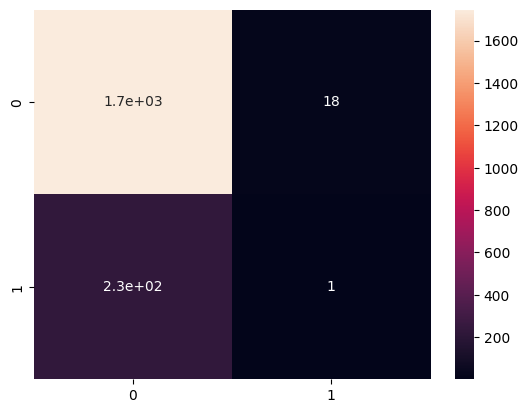

In [57]:
from sklearn.metrics import confusion_matrix


sns.heatmap(confusion_matrix(ytest,lr_test),annot=True)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [59]:
s=StandardScaler()

In [60]:
for i in xtrain.columns:
    xtrain[i]=s.fit_transform(xtrain[[i]])
    xtest[i]=s.transform(xtest[[i]])

In [61]:
knn =KNeighborsClassifier(n_neighbors=5)

In [62]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [63]:
print(classification_report(ytest,knn.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      1764
         1.0       0.11      0.11      0.11       230

    accuracy                           0.79      1994
   macro avg       0.50      0.50      0.50      1994
weighted avg       0.79      0.79      0.79      1994



<Axes: >

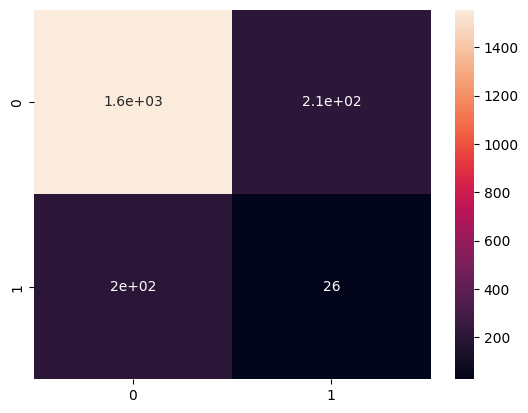

In [64]:
sns.heatmap(confusion_matrix(ytest,knn.predict(xtest)),annot=True)

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [66]:
k_n = [i for i in range(3,21,2)]
cross_val = []

k_n

[3, 5, 7, 9, 11, 13, 15, 17, 19]

In [67]:
for i in k_n:
    knn = KNeighborsClassifier(n_neighbors=i)
    cross_val.append(np.mean(cross_val_score(estimator=knn,X=xtrain,y=ytrain,cv=5,scoring="recall", n_jobs=-1)))

In [68]:
np.argmax(cross_val)

np.int64(0)

In [69]:
k_optimal = k_n[np.argmax(cross_val)]
k_optimal

3

In [70]:
knn_model_optimal = KNeighborsClassifier(n_neighbors=k_optimal)
knn_model_optimal.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [71]:
print(classification_report(ytrain,knn_model_optimal.predict(xtrain)))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      7029
         1.0       0.95      0.96      0.96      7029

    accuracy                           0.96     14058
   macro avg       0.96      0.96      0.96     14058
weighted avg       0.96      0.96      0.96     14058



In [72]:
print(classification_report(ytest,knn_model_optimal.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      1764
         1.0       0.10      0.10      0.10       230

    accuracy                           0.79      1994
   macro avg       0.49      0.49      0.49      1994
weighted avg       0.79      0.79      0.79      1994



In [73]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt= DecisionTreeClassifier(max_depth=3)

In [74]:
param = {"max_depth": [i for i in range(2,6)],
    "min_samples_split":[i for i in range(2,7)]}

In [75]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(),
                    param_grid=param,
                    cv=5,n_jobs=-1)

NameError: name 'GridSearchCV' is not defined

In [ ]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6]})

In [ ]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

In [ ]:
print(classification_report(ytrain,dt.predict(xtrain)))

              precision    recall  f1-score   support

         0.0       0.70      0.96      0.81      7051
         1.0       0.93      0.60      0.73      7051

    accuracy                           0.78     14102
   macro avg       0.82      0.78      0.77     14102
weighted avg       0.82      0.78      0.77     14102



In [ ]:
print(classification_report(ytest,dt.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1756
         1.0       0.12      0.04      0.06       240

    accuracy                           0.85      1996
   macro avg       0.50      0.50      0.49      1996
weighted avg       0.79      0.85      0.81      1996



[Text(0.5, 0.875, 'x[24] <= 0.26\ngini = 0.5\nsamples = 14102\nvalue = [7051, 7051]'),
 Text(0.25, 0.625, 'x[23] <= 0.284\ngini = 0.482\nsamples = 8828\nvalue = [3567, 5261]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[25] <= 3.153\ngini = 0.139\nsamples = 3702\nvalue = [278, 3424]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 3372\nvalue = [0, 3372]'),
 Text(0.1875, 0.125, 'gini = 0.265\nsamples = 330\nvalue = [278.0, 52.0]'),
 Text(0.375, 0.375, 'x[35] <= 0.45\ngini = 0.46\nsamples = 5126\nvalue = [3289.0, 1837.0]'),
 Text(0.3125, 0.125, 'gini = 0.492\nsamples = 3426\nvalue = [1932.0, 1494.0]'),
 Text(0.4375, 0.125, 'gini = 0.322\nsamples = 1700\nvalue = [1357, 343]'),
 Text(0.75, 0.625, 'x[37] <= 0.211\ngini = 0.448\nsamples = 5274\nvalue = [3484, 1790]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[38] <= 0.442\ngini = 0.49\nsamples = 2956\nvalue = [1683, 1273]'),
 Text(0.5625, 0.125, 'gini = 0.396\nsamples = 1164\nvalue = [316, 848]'),
 Text(0.6875, 0.125, 'g

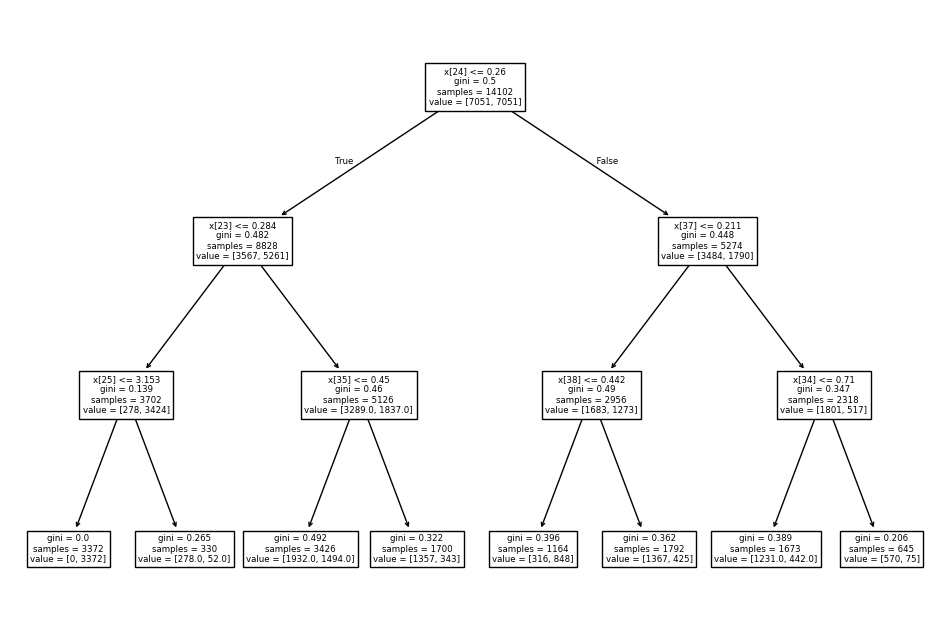

In [ ]:
plt.figure(figsize=[12,8])
plot_tree(dt)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gb_model = GaussianNB()
gb_model.fit(xtrain,ytrain)

GaussianNB()

In [ ]:
print(classification_report(ytest, gb_model.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82      1756
         1.0       0.13      0.26      0.17       240

    accuracy                           0.70      1996
   macro avg       0.51      0.51      0.50      1996
weighted avg       0.79      0.70      0.74      1996



In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(xtrain,ytrain)

SVC()

In [ ]:
def report(model):
    print("Test")
    print(classification_report(ytest,model.predict(xtest)))
    print("Train")
    print(classification_report(ytrain,model.predict(xtrain)))


In [ ]:
report(svm_model)

Test
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      1756
         1.0       0.00      0.00      0.00       240

    accuracy                           0.88      1996
   macro avg       0.44      0.50      0.47      1996
weighted avg       0.77      0.88      0.82      1996

Train
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      7051
         1.0       1.00      0.86      0.93      7051

    accuracy                           0.93     14102
   macro avg       0.94      0.93      0.93     14102
weighted avg       0.94      0.93      0.93     14102



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid2 = {"C":[0,0.01,0.1],
               "kernel":["rbf","poly","linear","sigmoid"]}

In [ ]:
grid2 = GridSearchCV(estimator=SVC(),
                     param_grid=param_grid2,scoring="recall",
                     cv= 5,
                     n_jobs=-1)

In [ ]:
grid2.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0, 0.01, 0.1],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             scoring='recall')

In [ ]:
grid2.best_params_

{'C': 0.01, 'kernel': 'poly'}

In [ ]:
svc_model = SVC(C=0.1,kernel='linear')
svc_model.fit(xtrain,ytrain)

SVC(C=0.1, kernel='linear')

In [ ]:
report(svc_model)

Test
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      1756
         1.0       0.00      0.00      0.00       240

    accuracy                           0.88      1996
   macro avg       0.44      0.50      0.47      1996
weighted avg       0.77      0.88      0.82      1996

Train
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      7051
         1.0       1.00      0.86      0.92      7051

    accuracy                           0.93     14102
   macro avg       0.94      0.93      0.93     14102
weighted avg       0.94      0.93      0.93     14102

